In [1]:
import matplotlib.pyplot as plt
import copy

from obspy.clients.fdsn.client import Client
from obspy import UTCDateTime
from obspy.core.event import Catalog
from obspy.core.stream import Stream
from obspy import read_events
from obspy import read_inventory
import cartopy.crs as ccrs


/Users/user/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# CATALOGUE

In [3]:
client=Client('INGV')

stime=UTCDateTime('2014-01-01T00:00:00')
etime=UTCDateTime('2023-11-20T00:00:00')

In [4]:
#get_events saccorotti
cat=client.get_events(starttime=stime,endtime=etime,
                      minlatitude=40.75,maxlatitude=40.90,minlongitude=14.00,
                      maxlongitude=14.20)

cat

741 Event(s) in Catalog:
2023-11-11T19:15:55.849000Z | +40.834,  +14.138 | 1.3  Md | manual
2023-11-10T17:51:58.279000Z | +40.827,  +14.142 | 1.3  Md | manual
...
2015-10-07T07:20:34.000000Z | +40.836,  +14.149 | 1.5  Md | manual
2014-09-20T22:09:41.000000Z | +40.800,  +14.130 | 0.6  Md | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'

In [6]:
#get events giaco
lat=40.8478
long=14.0918
rad_events=0.15
cat=client.get_events(starttime=stime,endtime=etime,includearrivals=False,          
                      latitude=lat,longitude=long,maxradius=rad_events) 

cat               

726 Event(s) in Catalog:
2023-11-11T19:15:55.849000Z | +40.834,  +14.138 | 1.3  Md | manual
2023-11-10T17:51:58.279000Z | +40.827,  +14.142 | 1.3  Md | manual
...
2015-10-07T07:20:34.000000Z | +40.836,  +14.149 | 1.5  Md | manual
2014-09-20T22:09:41.000000Z | +40.800,  +14.130 | 0.6  Md | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'

### create new catalogue with only manual events (ELIMINATE EVENTS SOLUTION?)

In [5]:
cat_manual=Catalog()

for ev in cat:
    if ev['origins'][0].evaluation_mode == 'manual':
        eid=ev.resource_id.id.split('=')[1]                                         #id number
        cat_manual += client.get_events(includearrivals=True,eventid=eid)
        

cat_manual

741 Event(s) in Catalog:
2023-11-11T19:15:55.849000Z | +40.834,  +14.138 | 1.3  Md | manual
2023-11-10T17:51:58.279000Z | +40.827,  +14.142 | 1.3  Md | manual
...
2015-10-07T07:20:34.000000Z | +40.836,  +14.149 | 1.5  Md | manual
2014-09-20T22:09:41.000000Z | +40.800,  +14.130 | 0.6  Md | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'

### plot events location and mag with cartopy

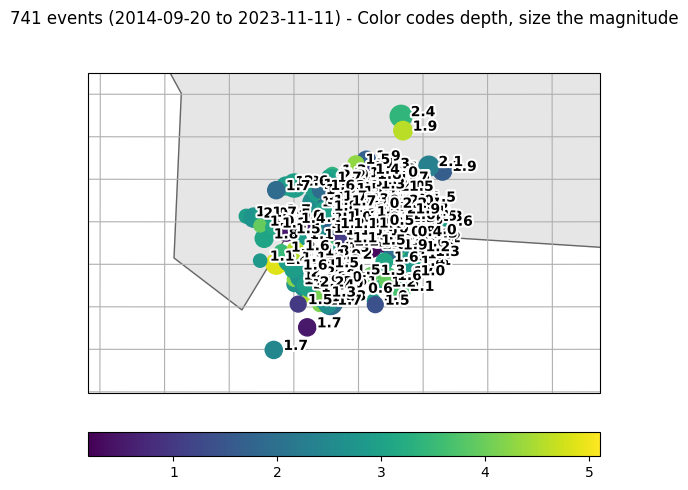

In [24]:
cat_manual.plot(projection='local',resolution='i');

In [32]:
cat_manual[30].picks[0].__dict__

{'resource_id': smi:webservices.ingv.it/fdsnws/event/1/query?pickId=697847761,
 'time': 2023-10-16T10:36:22.130000Z,
 'time_errors': QuantityError({'uncertainty': 0.1, 'lower_uncertainty': None, 'upper_uncertainty': None, 'confidence_level': None}),
 'waveform_id': WaveformStreamID
	  network_code: 'IV'
	  station_code: 'CSFT'
	  channel_code: 'HHZ'
	 location_code: '',
 'filter_id': None,
 'method_id': smi:webservices.ingv.it/fdsnws/event/1/query?methodID=1401,
 'horizontal_slowness': None,
 'horizontal_slowness_errors': None,
 'backazimuth': None,
 'backazimuth_errors': None,
 'slowness_method_id': None,
 'onset': 'questionable',
 'phase_hint': 'P',
 'polarity': 'negative',
 'evaluation_mode': 'automatic',
 'evaluation_status': None,
 'creation_info': CreationInfo(agency_id='INGV ', author='hew10_mole#MOD_EQASSEMBLE', creation_time=UTCDateTime(2023, 10, 16, 10, 36, 37)),
 'comments': []}

### eliminate automatic picking from catalogue

In [33]:
for ev in cat_manual:

    ind_picks=[]
    for ind,pick in enumerate(ev.picks):
        if pick.evaluation_mode == 'automatic':
            ind_picks.append(ind)
    
    for ind in reversed(ind_picks):
        del ev.picks[ind]

25 ------- 13
129 ------- 68
169 ------- 86
66 ------- 37
40 ------- 22
192 ------- 142
108 ------- 80
83 ------- 45
30 ------- 0
26 ------- 18
34 ------- 25
19 ------- 15
50 ------- 45
29 ------- 20
90 ------- 69
30 ------- 20
133 ------- 74
88 ------- 72
29 ------- 21
69 ------- 48
111 ------- 62
24 ------- 16
29 ------- 21
45 ------- 31
39 ------- 34
20 ------- 16
25 ------- 20
32 ------- 21
87 ------- 43
21 ------- 16
75 ------- 45
46 ------- 33
34 ------- 27
52 ------- 33
27 ------- 22
33 ------- 25
56 ------- 34
74 ------- 66
63 ------- 38
4 ------- 0
24 ------- 16
142 ------- 98
81 ------- 46
23 ------- 18
40 ------- 30
25 ------- 17
19 ------- 14
35 ------- 24
46 ------- 28
26 ------- 18
54 ------- 31
34 ------- 27
45 ------- 29
32 ------- 20
38 ------- 26
35 ------- 25
73 ------- 62
72 ------- 43
21 ------- 15
22 ------- 16
26 ------- 17
22 ------- 17
51 ------- 32
120 ------- 92
22 ------- 14
79 ------- 45
22 ------- 17
53 ------- 39
72 ------- 44
31 ------- 23
31 ------- 22


some events have no picks (bad)

save catalogue

In [35]:
cat_manual.write('flegrei_2014_2023_INGV/catalogue_flegrei.xml',format='QUAKEML')

load catalogue from local

In [3]:
catf=read_events('flegrei_2014_2023_INGV/catalogue_flegrei.xml')

In [10]:
catf.__dict__
catf.events[0].origins[0].__dict__


{'resource_id': smi:webservices.ingv.it/fdsnws/event/1/query?originId=123045901,
 'time': 2023-11-11T19:15:55.849000Z,
 'time_errors': QuantityError({'uncertainty': None, 'lower_uncertainty': None, 'upper_uncertainty': None, 'confidence_level': None}),
 'longitude': 14.137667,
 'longitude_errors': QuantityError({'uncertainty': None, 'lower_uncertainty': None, 'upper_uncertainty': None, 'confidence_level': None}),
 'latitude': 40.8335,
 'latitude_errors': QuantityError({'uncertainty': None, 'lower_uncertainty': None, 'upper_uncertainty': None, 'confidence_level': None}),
 'depth': 2920.0,
 'depth_errors': QuantityError({'uncertainty': 100.0, 'lower_uncertainty': None, 'upper_uncertainty': None, 'confidence_level': None}),
 'depth_type': 'from location',
 'time_fixed': None,
 'epicenter_fixed': None,
 'reference_system_id': None,
 'method_id': smi:webservices.ingv.it/fdsnws/event/1/query?methodId=271,
 'earth_model_id': smi:webservices.ingv.it/fdsnws/event/1/query?earthModelId=71,
 'qual